## ライブラリのインポート

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, f1_score

In [133]:
df_games= pd.read_csv('./data/games.csv')
df_teams = pd.read_csv('./data/teams.csv')
df_columns = ['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID','PTS_home', 'PTS_away', 'HOME_TEAM_WINS']
df = df_games[df_columns]
df.head()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,PTS_away,HOME_TEAM_WINS
0,22200477,1610612740,1610612759,126.0,117.0,1
1,22200478,1610612762,1610612764,120.0,112.0,1
2,22200466,1610612739,1610612749,114.0,106.0,1
3,22200467,1610612755,1610612765,113.0,93.0,1
4,22200468,1610612737,1610612741,108.0,110.0,0


### モデルを組んで実際に学習してみる

In [134]:
# 欠損値があるレコードは除去
df.dropna(how='any', inplace=True)

# 説明変数をdataXに格納
dataX = df.drop(['HOME_TEAM_WINS'], axis=1)

# 目的変数をdataYに格納
dataY = df['HOME_TEAM_WINS']

# データの分割を行う（学習用データ 0.8 評価用データ 0.2）
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY)

# 訓練データの標準化を行う
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)


C:\Users\tsukakoshi yuma\AppData\Local\Temp\ipykernel_11748\5535796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='any', inplace=True)


In [135]:
# アンバランスは起きてないことを確認
print(df['HOME_TEAM_WINS'].value_counts())

HOME_TEAM_WINS
1    15645
0    10907
Name: count, dtype: int64


## 学習

In [136]:
# 分類器を作成（ロジスティック回帰）
clf = LogisticRegression()

# 学習
clf.fit(X_train, y_train)

LogisticRegression()

## 評価

In [137]:
# 予測
y_pred = clf.predict(X_test_std)

print("正解率:", accuracy_score(y_test, y_pred))
print("混同行列:",confusion_matrix(y_test, y_pred, labels=[1, 0]))
print("F値:", f1_score(y_test, y_pred))

正解率: 0.5149689324044436
混同行列: [[1841 1288]
 [1288  894]]
F値: 0.5883668903803132


### データの可視化を行う

ホームチームとアウェイチームの勝率の比較：ホームチームとアウェイチームの勝率をそれぞれ計算し、ホームアドバンテージの有無や程度を見る

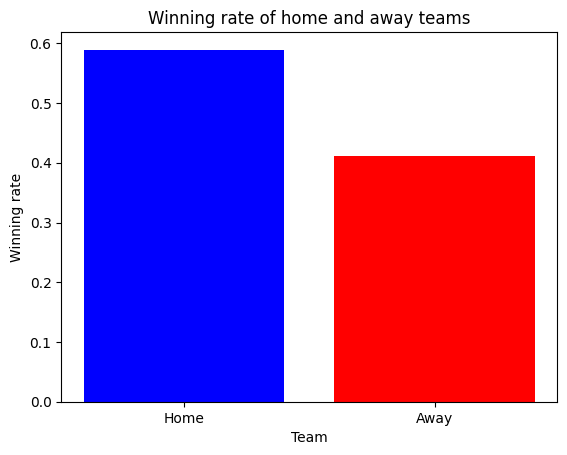

In [138]:
# ホームチームとアウェイチームの勝利数を集計する
home_wins = df["HOME_TEAM_WINS"].sum()
away_wins = len(df) - home_wins

# ホームチームとアウェイチームの勝率を計算する
home_rate = home_wins / len(df)
away_rate = away_wins / len(df)

# 棒グラフを描画する
plt.bar(["Home", "Away"], [home_rate, away_rate], color=["blue", "red"])
plt.title("Winning rate of home and away teams")
plt.xlabel("Team")
plt.ylabel("Winning rate")
plt.show()

上記の棒グラフから、ホームコートの方がにわかに勝率が上がることがわかる。

チームごとのホームとアウェイでの勝率の差：各チームごとにホームでの勝率とアウェイでの勝率を計算し、その差を求めることで、各チームがホームアドバンテージやアウェイディスアドバンテージにどれくらい影響されるかを見る

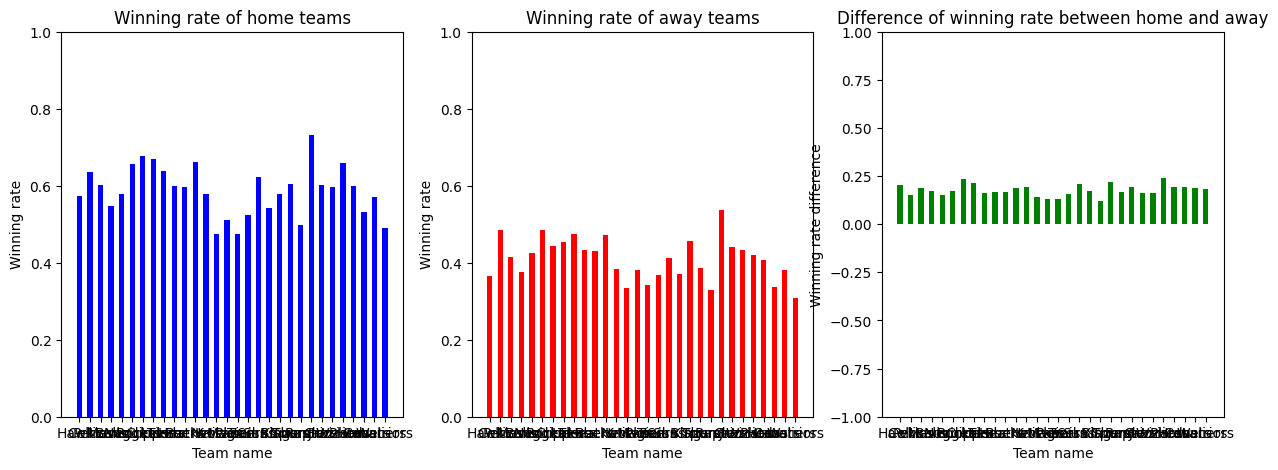

In [139]:

# チームごとにホームでの試合数と勝利数を集計する
home_games = df.groupby("HOME_TEAM_ID")["GAME_ID"].count()
home_wins = df.groupby("HOME_TEAM_ID")["HOME_TEAM_WINS"].sum()

# チームごとにアウェイでの試合数と勝利数を集計する
away_games = df.groupby("VISITOR_TEAM_ID")["GAME_ID"].count()
away_wins = away_games - df.groupby("VISITOR_TEAM_ID")["HOME_TEAM_WINS"].sum()

# チームごとにホームでの勝率とアウェイでの勝率を計算する
home_rate = home_wins / home_games
away_rate = away_wins / away_games

# チームごとにホームとアウェイでの勝率の差を求める
rate_diff = home_rate - away_rate

# チームごとにホームとアウェイでの勝率の差を棒グラフで描画する
fig = plt.figure(figsize=(15,5))

# グラフを描画するsubplot領域を作成
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 各subplot領域にデータを渡す
ax1.bar(df_teams["NICKNAME"], home_rate, width=0.5, color="blue", label="Home")
ax2.bar(df_teams["NICKNAME"], away_rate, width=0.5, color="red", label="Away")
ax3.bar(df_teams["NICKNAME"], rate_diff, width=0.5, color="green", label="Difference")

ax1.set_ylim([0,1])
ax2.set_ylim([0,1])
ax3.set_ylim([-1,1])

# 各subplotにタイトルを追加
ax1.set_title("Winning rate of home teams")
ax2.set_title("Winning rate of away teams")
ax3.set_title("Difference of winning rate between home and away")

# 各subplotにxラベルを追加
ax1.set_xlabel("Team name")
ax2.set_xlabel("Team name")
ax3.set_xlabel("Team name")

# 各subplotにyラベルを追加
ax1.set_ylabel("Winning rate")
ax2.set_ylabel("Winning rate")
ax3.set_ylabel("Winning rate difference")

plt.show()